### 连续型Hopfield神经网络求解TSP

In [1]:
import numpy as np
from matplotlib import pyplot as plt

0.给定初始的城市数值.

In [3]:
def price_cn(vec1, vec2):
    return np.linalg.norm(np.array(vec1) - np.array(vec2))

def calc_distance(path):
    dis = 0.0
    for i in range(len(path) - 1):
        dis += distance[path[i]][path[i+1]]
    return dis

# 得到城市之间的距离矩阵
def get_distance(citys):
    N = len(citys)
    distance = np.zeros((N, N))
    for i, curr_point in enumerate(citys):
        line = []
        [line.append(price_cn(curr_point, other_point)) if i != j else line.append(0.0) for j, other_point in enumerate(citys)]
        distance[i] = line
    return distance

1.初始化参数

2.初始化神经网络的当前状态U_ik和输出V_ik

3.利用动力微分方程计算：dUik/dt

In [4]:
def get_du(V, distance):
    a = np.sum(V, axis=0) # 按列相加
    b = np.sum(V, axis=1) # 按行相加
    c = np.sum(np.sum(V)) - N # 全部元素相加
    t1 = np.zeros((N, N))
    t2 = np.zeros((N, N))
    t3 = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            t1[i, j] = a[j]
            t2[j, i] = b[j]
            t3[i, j] = c

    d_1 = V[:, 1:N]
    d_0 = np.zeros((N, 1))
    d_0[:, 0] = V[:, 0]
    d = np.concatenate((d_1, d_0), axis=1)
    t4 = np.dot(distance, d)

    return -A * t1 - B * t2 - C * t3 - D * t4

4.由一阶欧拉方法更新计算：Uik(t+1) = Uik(t) + dUik/dt * tau

In [5]:
def get_U(U, du, step):
    return U + du*step

5.由非线性函数sigmoid更新计算：Vxi(t) = 0.5 * (1 + th(Uxi/U0))

In [6]:
def get_V(U, U0):
    return 1/2 * (1 + np.tanh(U/U0))

6.计算能量函数E

In [7]:
def get_energy(V, distance):
    N = distance.shape[0]
    t1 = np.sum(np.power(np.sum(V, axis=0) - 1, 2))
    t2 = np.sum(np.power(np.sum(V, axis=1) - 1, 2))
    idx = [i for i in range(1, N)]
    idx = idx + [0]
    Vt = V[:, idx]
    t4 = distance * Vt
    t4 = np.sum(np.sum(np.multiply(V, t4)))
    e = 0.5 * (A * t1 + B * t2 + C * (np.sum(np.sum(V)) - N)+ D * t4)
    return e

7.检查路径是否合法

In [8]:
def check_path(V):
    newV = np.zeros([N, N])
    route = []
    for i in range(N):
        mm = np.max(V[:, i])
        for j in range(N):
            if V[j, i] == mm:
                newV[j, i] = 1
                route += [j]
                break
    return route, newV


9.画图

In [9]:
def draw_E(energys):
    fig = plt.figure()
    plt.subplot(111)
    plt.plot(np.arange(0, len(energys), 1), energys, color='red')


#### 主函数

In [10]:
distance = np.array([[ 0, 2, 6, 7,14, 5, 9],
                     [ 2, 0, 7, 4,13, 9, 1],
                     [ 6, 7, 0,20, 3, 8, 5],
                     [ 7, 4,20, 0, 6, 4,12],
                     [14,13, 3, 6, 0, 8, 2],
                     [ 5, 9, 8, 4, 8, 0, 5],
                     [ 9, 1, 5,12, 2, 5, 0]])

第289次迭代找到的次优解距离为：26.0，能量为：22.19170462335204，路径为：
g,f,d,b,a,c,e,g
第891次迭代找到的次优解距离为：25.0，能量为：96.25698959104224，路径为：
d,b,g,e,c,a,f,d


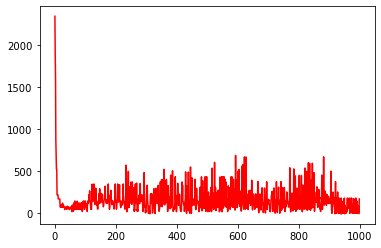

In [21]:
N = distance.shape[0]
A = N*N
B = N*N
C = N*N
D = N/2

U0 = 0.0009
tau = 0.0001
iters = 1000

U = 1/2 * U0 * np.log(N-1) + 2 * np.random.random((N,N)) - 1
V = get_V(U, U0)

energys = np.array([0.0 for i in range(iters)])
best_distance = np.inf
best_route = []


for iter in range(iters):
    du = get_du(V, distance)
    U = get_U(U, du, tau)
    V = get_V(U, U0)
    energys[iter] = get_energy(V, distance)
    route, newV = check_path(V)

    if len(np.unique(route)) == N:
        route.append(route[0])
        dis = calc_distance(route)
        if dis < best_distance:
            H_path = []
            best_distance = dis
            best_route = route
            [H_path.append((route[i], route[i + 1])) for i in range(len(route) - 1)]
            print('第{}次迭代找到的次优解距离为：{}，能量为：{}，路径为：'.format(iter, best_distance, energys[iter]))
            [print(chr(97 + v), end=',' if i < len(best_route) - 1 else '\n') for i, v in enumerate(best_route)]

if len(H_path) > 0:
      draw_E(energys)
else:
    print('没有找到最优解')